# Titanic Project

In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv("train.csv")

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


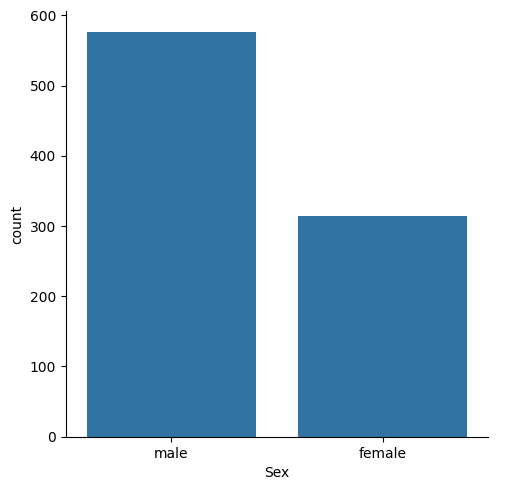

In [14]:
sns.catplot(data = titanic_df, x='Sex', kind='count')
plt.show()

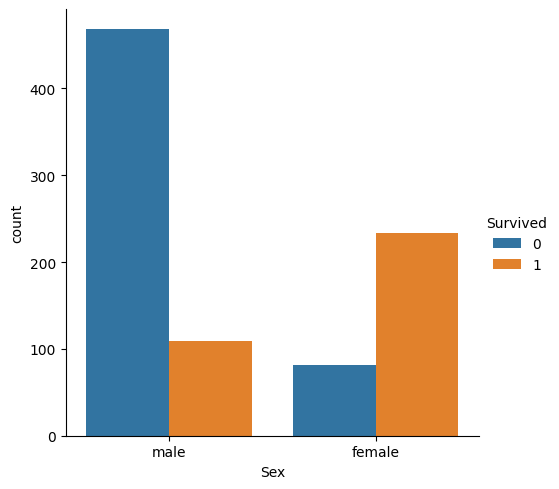

In [15]:
sns.catplot(data = titanic_df, x='Sex', kind='count', hue='Survived')
plt.show()

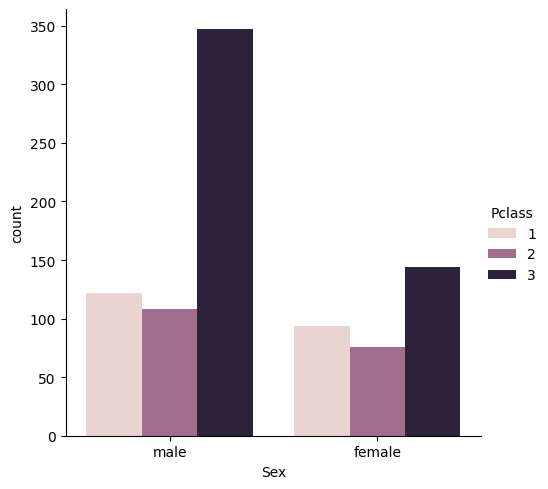

In [16]:
sns.catplot(data = titanic_df, x='Sex', kind='count', hue='Pclass')
plt.show()

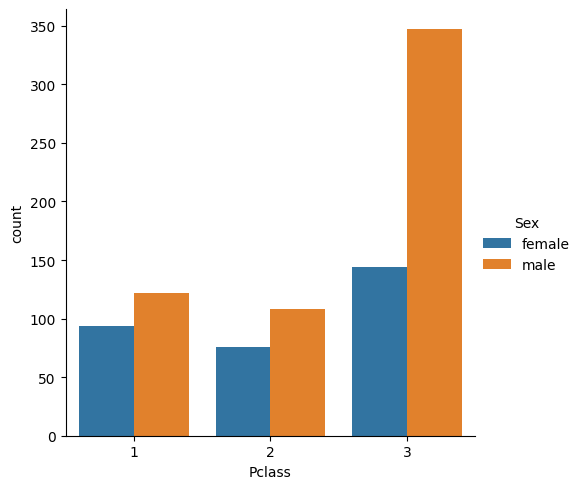

In [20]:
sns.catplot(x="Pclass", data=titanic_df, kind="count", hue='Sex')
plt.show();

In [22]:
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [23]:
titanic_df['Person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis = 1)

In [25]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


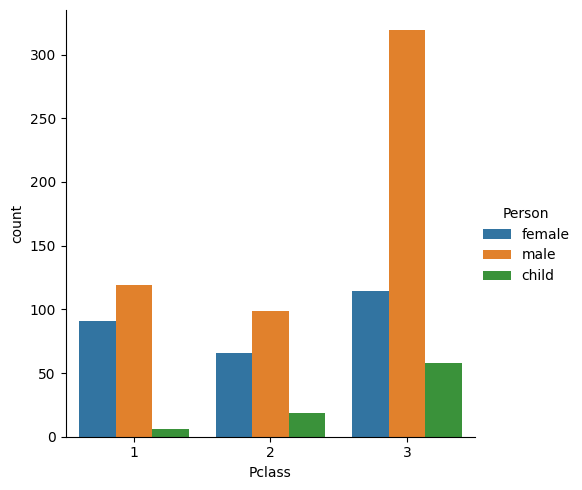

In [28]:
sns.catplot(x='Pclass', data=titanic_df, kind="count", hue="Person")
plt.show();

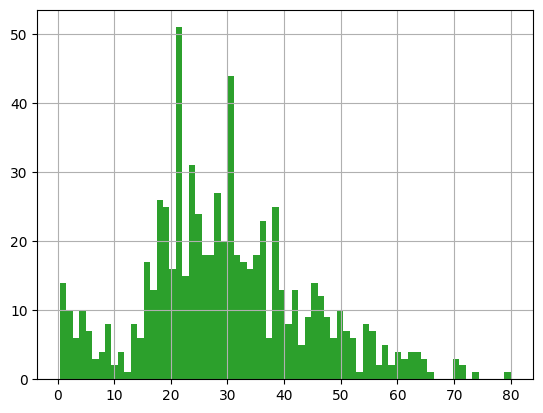

In [31]:
titanic_df["Age"].hist(bins=70)
plt.show()

In [33]:
titanic_df['Age'].mean()

np.float64(29.69911764705882)

In [34]:
titanic_df['Person'].value_counts()

Person
male      537
female    271
child      83
Name: count, dtype: int64

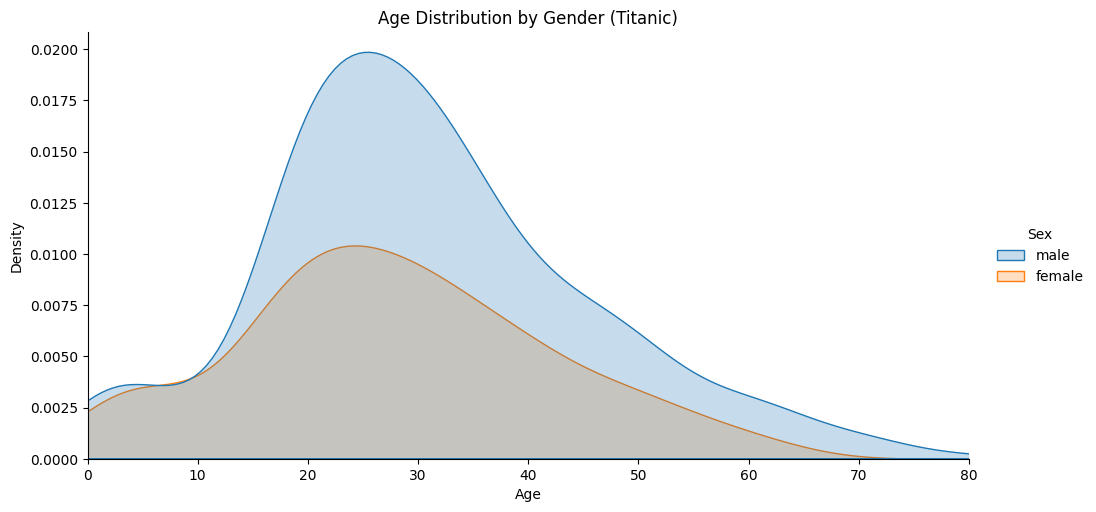

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get max age safely (ignore NaN values)
oldest = titanic_df['Age'].max()

# Plot KDE distribution by gender
sns.displot(
    data=titanic_df,
    x='Age',
    hue='Sex',
    kind='kde',
    fill=True,
    height=5,
    aspect=2
)

plt.xlim(0, oldest)
plt.title("Age Distribution by Gender (Titanic)")
plt.show()


<Figure size 1000x500 with 0 Axes>

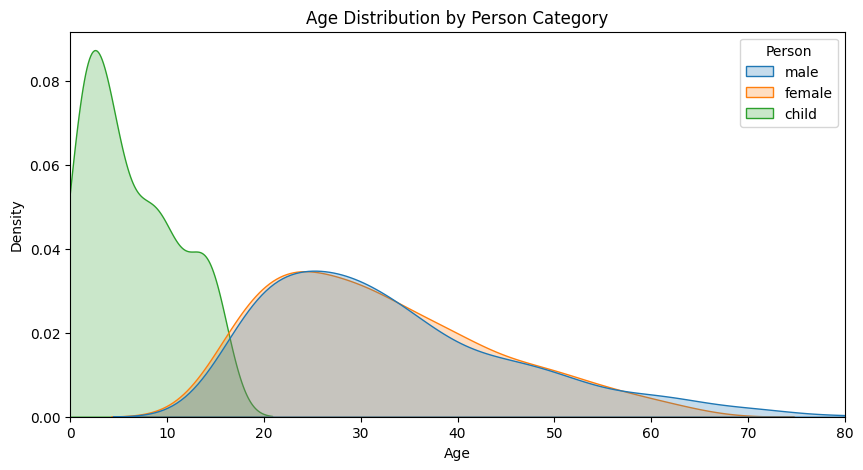

In [41]:
plt.figure(figsize=(10,5))

sns.kdeplot(
    data=titanic_df,
    x='Age',
    hue='Person',
    fill=True,
    common_norm=False
)

plt.xlim(0, titanic_df['Age'].max())
plt.title("Age Distribution by Person Category")
plt.show()


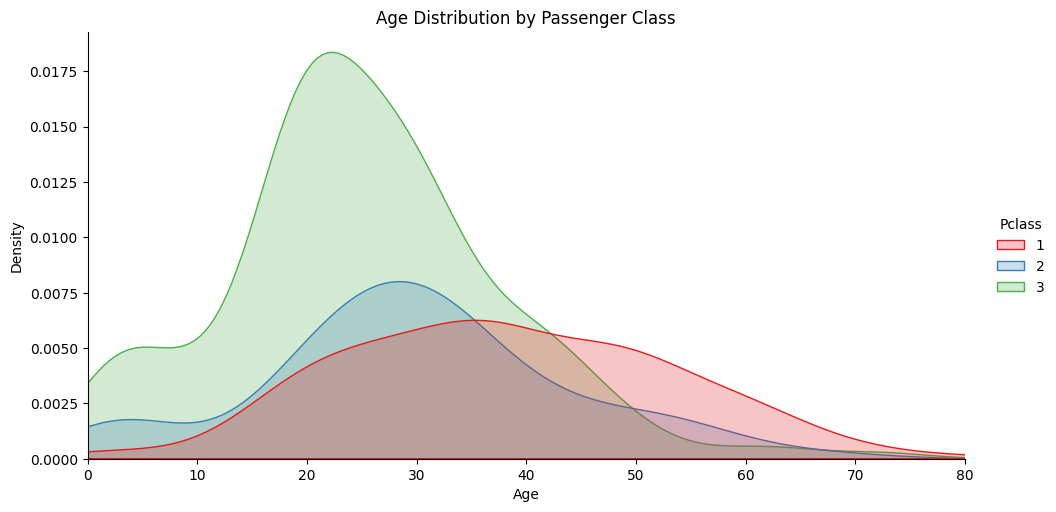

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove missing ages
df = titanic_df.dropna(subset=['Age'])

sns.displot(
    data=titanic_df,
    x='Age',
    hue='Pclass',
    kind='kde',
    fill=True,
    height=5,
    aspect=2,
    palette='Set1'
)

plt.xlim(0, titanic_df['Age'].max())
plt.title("Age Distribution by Passenger Class")
plt.show()


In [43]:
# Let's get a quick look at our dataset again
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [44]:
# First we'll drop the NaN values and create a new object, deck
deck = titanic_df['Cabin'].dropna()

In [45]:
# Quick preview of the decks
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

C:\Users\shwet\AppData\Local\Temp\ipykernel_10312\1963995227.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


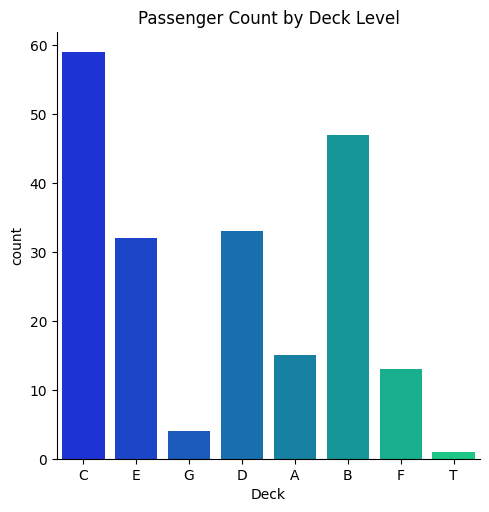

In [46]:
# Drop missing Cabin values
cabin_df = titanic_df.dropna(subset=['Cabin']).copy()

# Extract first letter (deck level)
cabin_df['Deck'] = cabin_df['Cabin'].str[0]

# Plot count of passengers by deck
sns.catplot(
    data=cabin_df,
    x='Deck',
    kind='count',
    palette='winter'
)

plt.title("Passenger Count by Deck Level")
plt.show()


C:\Users\shwet\AppData\Local\Temp\ipykernel_10312\3869366348.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


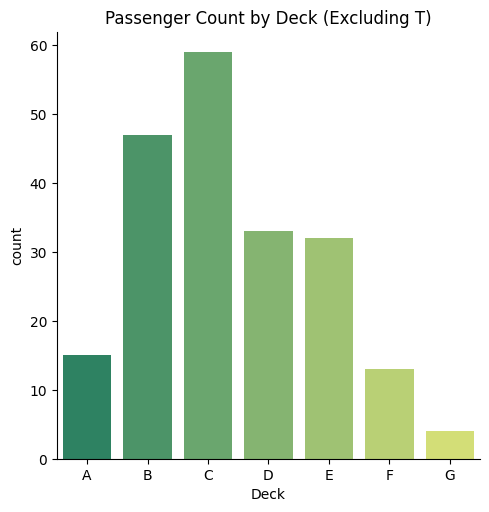

In [47]:
# Remove deck 'T'
cabin_df = cabin_df[cabin_df['Deck'] != 'T']

# Sort decks alphabetically
deck_order = sorted(cabin_df['Deck'].unique())

sns.catplot(
    data=cabin_df,
    x='Deck',
    kind='count',
    order=deck_order,
    palette='summer'
)

plt.title("Passenger Count by Deck (Excluding T)")
plt.show()


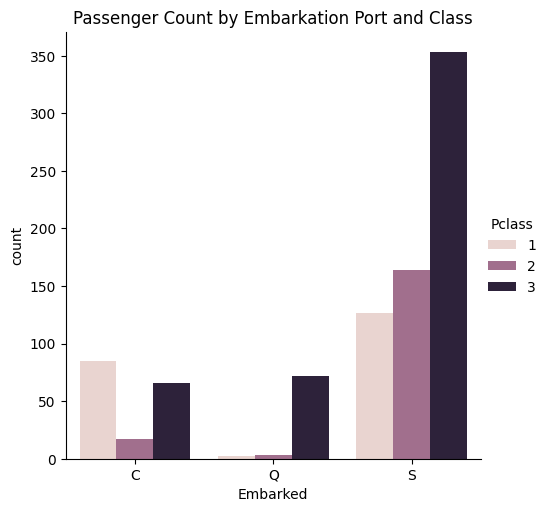

In [48]:
sns.catplot(
    data=titanic_df,
    x='Embarked',
    hue='Pclass',
    kind='count',
    order=['C', 'Q', 'S']
)

plt.title("Passenger Count by Embarkation Port and Class")
plt.show()


In [49]:
# Create family size
titanic_df['FamilySize'] = titanic_df['Parch'] + titanic_df['SibSp']

# Define Alone column
titanic_df['Alone'] = (titanic_df['FamilySize'] == 0).astype(int)

titanic_df[['FamilySize', 'Alone']].head()


,FamilySize,Alone
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1


In [50]:
# Convert numeric into labels safely
titanic_df.loc[titanic_df['Alone'] > 0, 'Alone'] = 'With Family'
titanic_df.loc[titanic_df['Alone'] == 0, 'Alone'] = 'Alone'


C:\Users\shwet\AppData\Local\Temp\ipykernel_10312\2514475874.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'With Family' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  titanic_df.loc[titanic_df['Alone'] > 0, 'Alone'] = 'With Family'


In [51]:
# Let's check to make sure it worked
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1,Alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1,Alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0,With Family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1,Alone
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0,With Family


C:\Users\shwet\AppData\Local\Temp\ipykernel_10312\449749404.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


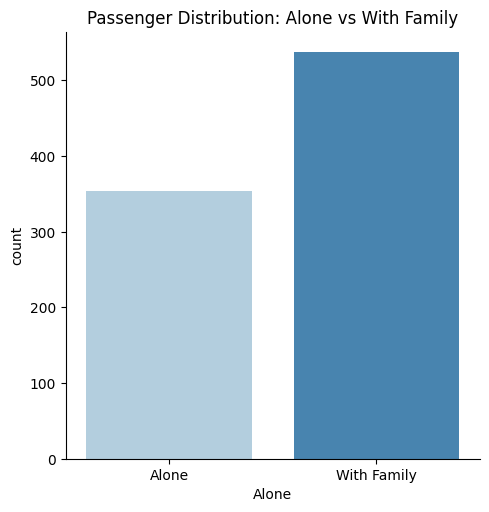

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(
    data=titanic_df,
    x='Alone',
    kind='count',
    palette='Blues'
)

plt.title("Passenger Distribution: Alone vs With Family")
plt.show()


C:\Users\shwet\AppData\Local\Temp\ipykernel_10312\1398039275.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


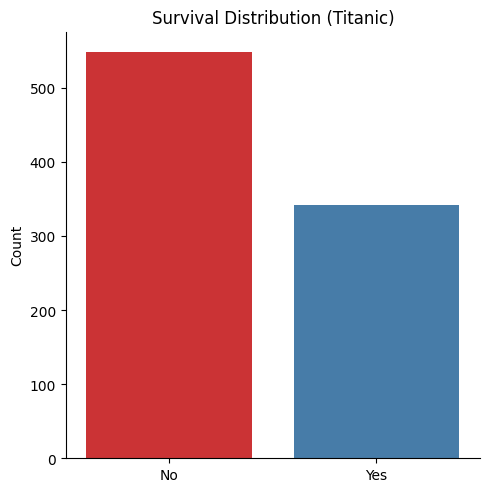

In [53]:
# Create readable Survivor column
titanic_df["Survivor"] = titanic_df["Survived"].map({0: "No", 1: "Yes"})

# Plot
sns.catplot(
    data=titanic_df,
    x="Survivor",
    kind="count",
    palette="Set1"
)

plt.title("Survival Distribution (Titanic)")
plt.xlabel("")
plt.ylabel("Count")
plt.show()


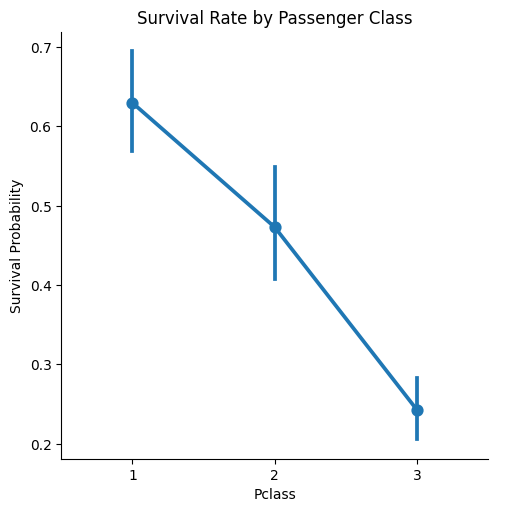

In [54]:
sns.catplot(
    data=titanic_df,
    x="Pclass",
    y="Survived",
    kind="point"
)

plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Probability")
plt.show()


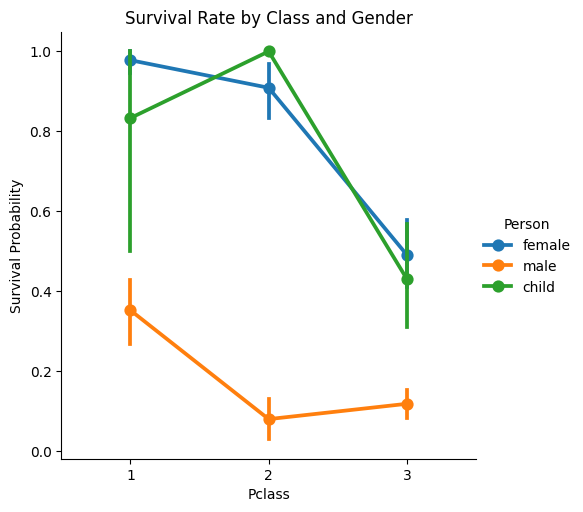

In [56]:
sns.catplot(
    data=titanic_df,
    x="Pclass",
    y="Survived",
    hue="Person",
    kind="point"
)

plt.title("Survival Rate by Class and Gender")
plt.ylabel("Survival Probability")
plt.show()


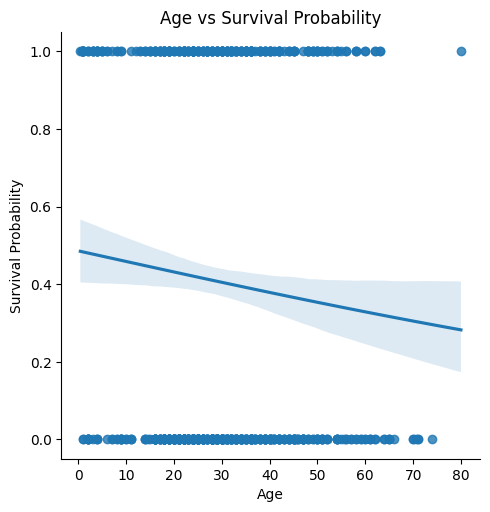

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(
    data=titanic_df,
    x="Age",
    y="Survived",
    logistic=True
)

plt.title("Age vs Survival Probability")
plt.ylabel("Survival Probability")
plt.show()


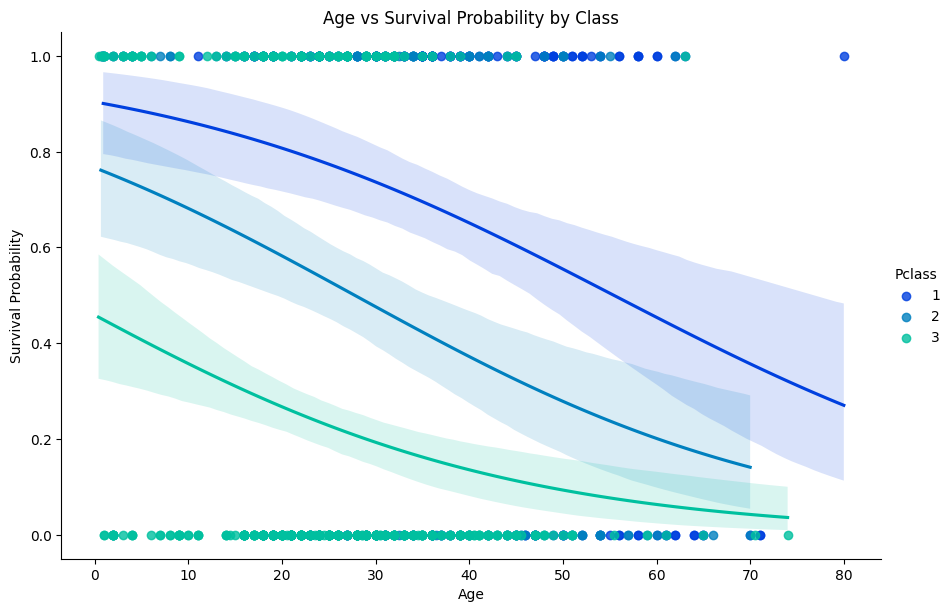

In [58]:
# Drop missing Age values
df = titanic_df.dropna(subset=["Age"])

sns.lmplot(
    data=df,
    x="Age",
    y="Survived",
    hue="Pclass",
    logistic=True,
    palette="winter",
    height=6,
    aspect=1.5
)

plt.title("Age vs Survival Probability by Class")
plt.ylabel("Survival Probability")
plt.show()


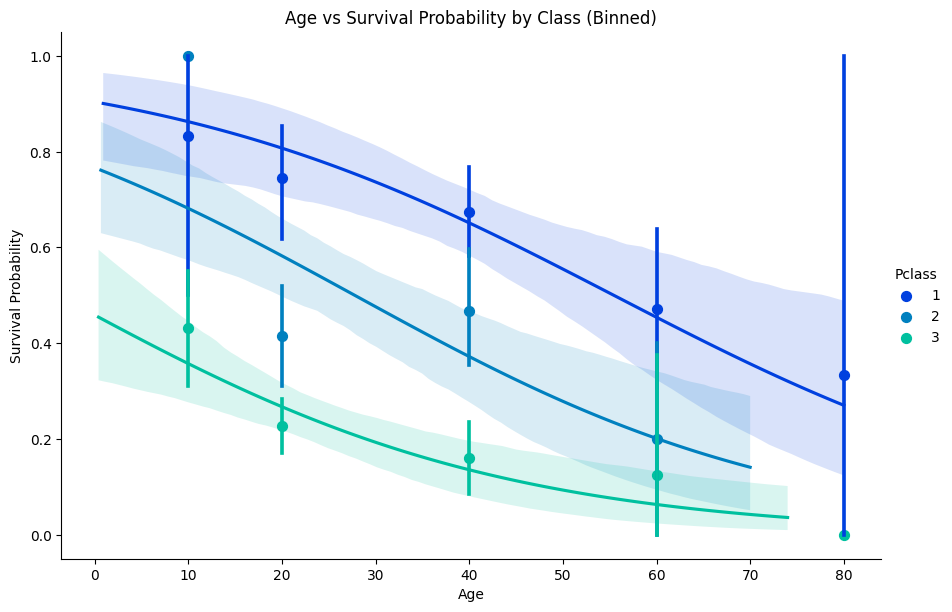

In [59]:
# Drop missing Age values
df = titanic_df.dropna(subset=["Age"])

generations = [10, 20, 40, 60, 80]

sns.lmplot(
    data=df,
    x="Age",
    y="Survived",
    hue="Pclass",
    logistic=True,
    x_bins=generations,
    palette="winter",
    height=6,
    aspect=1.5
)

plt.title("Age vs Survival Probability by Class (Binned)")
plt.ylabel("Survival Probability")
plt.show()


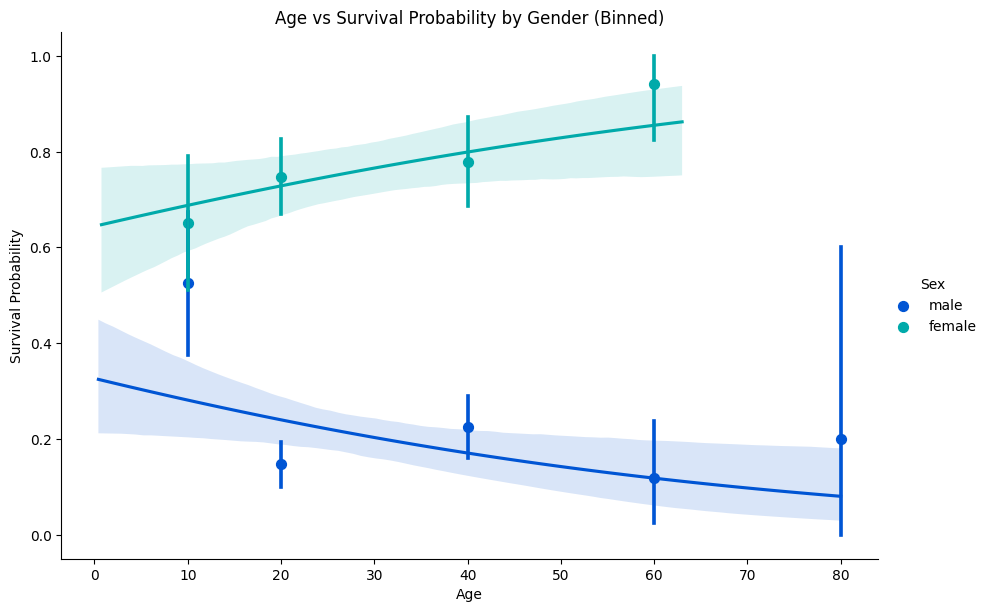

In [60]:
# Define bins
generations = [10, 20, 40, 60, 80]

# Drop missing Age values
df = titanic_df.dropna(subset=["Age"])

sns.lmplot(
    data=df,
    x="Age",
    y="Survived",
    hue="Sex",
    logistic=True,
    x_bins=generations,
    palette="winter",
    height=6,
    aspect=1.5
)

plt.title("Age vs Survival Probability by Gender (Binned)")
plt.ylabel("Survival Probability")
plt.show()


In [61]:
from IPython.display import Image
Image(url='http://i.imgur.com/DGNjT.gif')